<a href="https://colab.research.google.com/github/paulosrl/Datascience/blob/master/Analisando_os_Dados_do_Airbnb_Cape_Town.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - *Cape Town - África do Sul*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor do mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de na área de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Cape Town, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/south-africa/wc/cape-town/2020-05-25/visualisations/listings.csv")

#Análise dos Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.


##Dicionário de dados

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras linhas.

In [ ]:
# mostrar as 3 primeiras entradas
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,3191,Malleson Garden Cottage,3754,Brigitte,NaN,Ward 57,-33.94739,18.47600,Entire home/apt,819,3,54,2020-03-07,0.63,1,362
1,15007,Blaauwberg House,59072,Dirk,NaN,Ward 23,-33.80001,18.46063,Entire home/apt,2050,2,27,2019-08-18,0.34,4,251
2,15068,Grande Bay,59318,Linda,NaN,Ward 23,-33.78799,18.46082,Entire home/apt,2804,4,0,NaN,NaN,10,365


# **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [ ]:
# identificar o volume de dados do DataFrame
print("Linhas:\t {}".format(df.shape[0]))
print("Colunas:\t {}\n".format(df.shape[1]))
# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Linhas:	 24079
Colunas:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

# **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são SIGNIFICATIVOS comparados ao total de linhas.

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes, vazios ou em branco; 
* As colunas `reviews_per_month` e `last_review` possuem aproximadamente 28,33% de valores nulos;
* A coluna `name` não possui nenhum valor NULO;
* A coluna `host_name` têm aproximadamente 0,01% dos valores nulos.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
#df.isnull() - busca valores nulos no dataset, buscano pelo nome da coluna índice[0]
#df.isnull.sum() - soma por coluna a quantidade de valores nulos
#df.isnull.sum() / df.shape[0])*100 - total de valores nulos por coluna/ total de linhas do arquivo (df.shape[0]), multiplicado por 100
#.sort_values(ascendig=False) - classifica os valores em ordem descendente 

((df.isnull().sum() / df.shape[0])*100).sort_values(ascending=False)

neighbourhood_group               100.000000
reviews_per_month                  28.335894
last_review                        28.335894
host_name                           0.012459
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
minimum_nights                      0.000000
price                               0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_id                             0.000000
name                                0.000000
id                                  0.000000
dtype: float64

# **Q3. Como estão distribuídas as colunas numéricas do dataset?** 

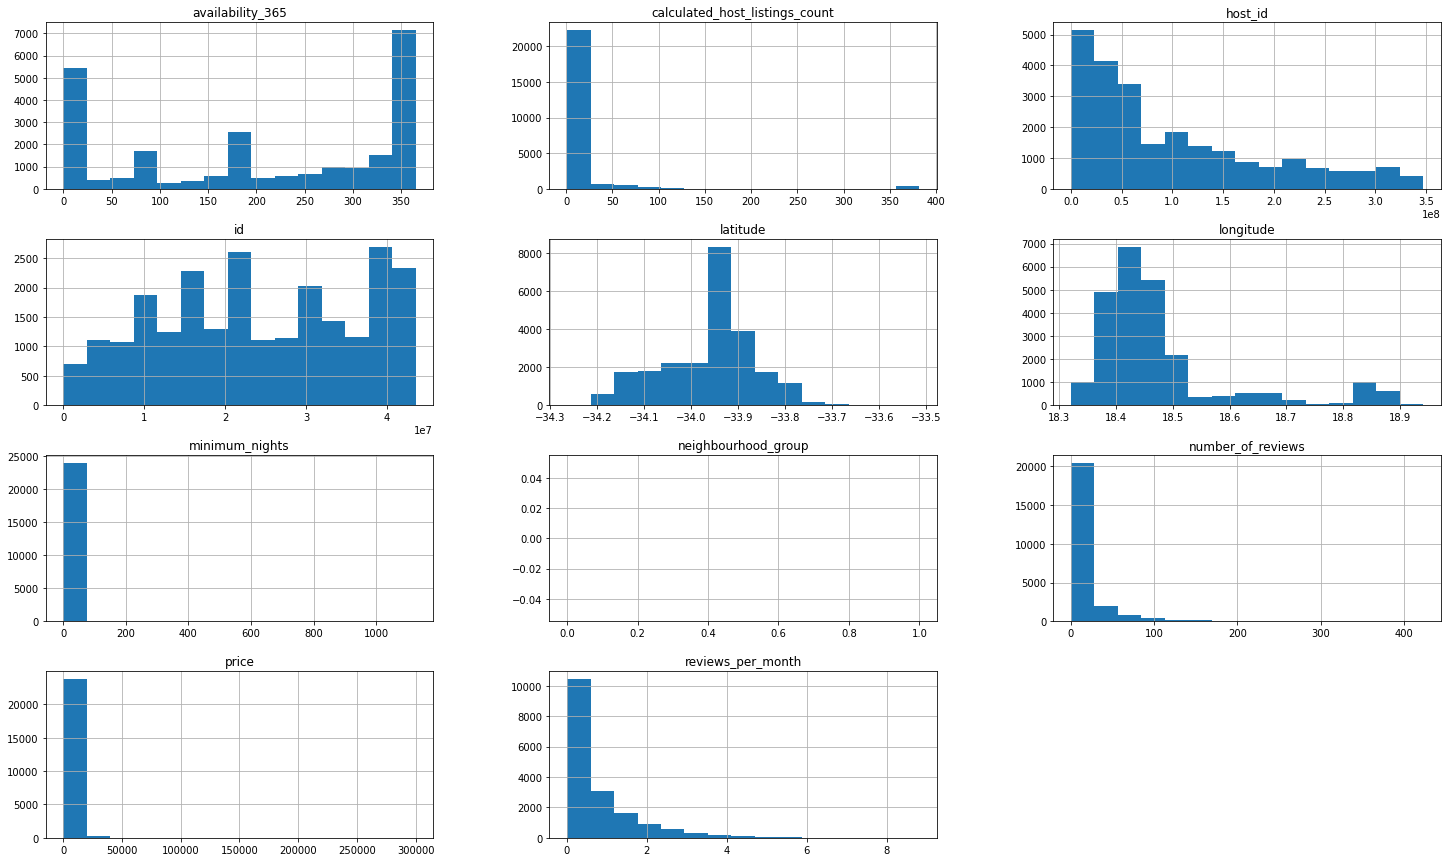

In [ ]:
# plotar o histograma das colunas numéricas
# número de barras do histograma
# figzise(largura,altura) do gráfico
df.hist(bins=15, figsize=(25,15));

Resumo dos números

# **Q4. Qual o resumo estatístico das colunas numéricas ?**

In [ ]:
# ver o resumo estatístico das colunas numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,24079.000000,24079.000000,24079.000000,17256.000000,24079.000000,24079.000000
mean,2470.004070,4.283525,14.499689,0.768173,12.732132,201.998463
std,7489.625844,14.406259,29.413476,0.931331,49.657158,143.103660
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,663.000000,1.000000,0.000000,0.150000,1.000000,57.000000
50%,1082.000000,2.000000,3.000000,0.400000,2.000000,208.000000
75%,2009.000000,4.000000,14.000000,1.042500,4.000000,356.000000
max,300008.000000,1125.000000,423.000000,8.820000,382.000000,365.000000


# **Q5. Existem outliers nas colunas numéricas?**

## O RESUMO estatístico acima, nos permite realizar algumas observações descritas a seguir:
* A média da diária (mean) em Cape Town está 2.470, porém observamos um desvio padrão (std) muito alto de 7.489;
** O desvio padrão (std) representa o quanto os valores estão distante da média para cima ou para baixo;

* O valor mínimo da diária (coluna `price`) está igual a 0;

* O valor máximo da diária (coluna `price`) é de $ 300.008, quando o dataset nos informa que 75% dos valores dessa coluna possuem valores abaixo de 2.009;

* 25% dos valores da coluna `price` estão abaixo de $ 663;

* 50% dos valores (Mediana) da coluna `price` estão abaixo de $ 1.082;

* 75% dos valores da coluna `price` estão abaixo de $ 2.009;

* A coluna mínimo de noites `minimum_nights` mostra uma valor de 1.125 noites;
** observar que 75% das pessoas ficam por até 4 noites, a mediana é de 2 noites e a média é de 4,3 noites;

## Analisando a distribuição dos valores da coluna minimum_nights (Boxplot) ?

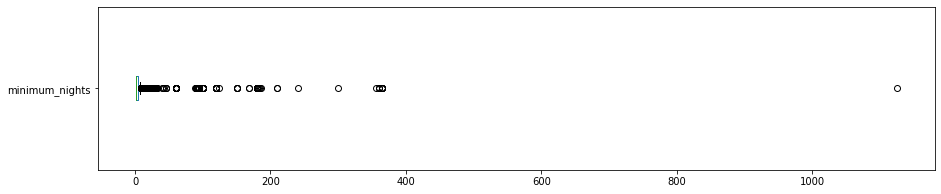

minimum_nights acima de 30 dias: 
173 entradas
0.7185%


In [ ]:
# realizando uma análise através do método Boxplot para minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights acima de 30 dias: ")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

## Analisando a distribuição dos valores da coluna price (Boxplot) ?

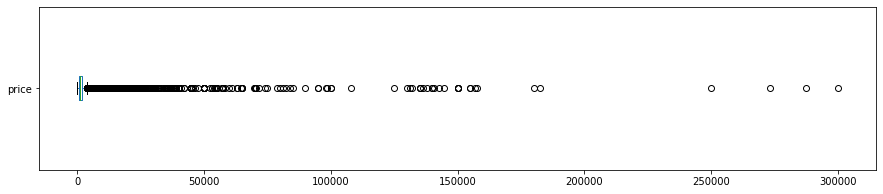


price: valores acima de $ 2.500,00
5064 entradas: 
21.0308%


In [ ]:
#   aplicando método boxplot para a variável price
df.price.plot(kind='box', vert= False, figsize=(15,3),)
plt.show()

# ver quantidade de valores acima de 2.500 para price
print("\nprice: valores acima de $ 2.500,00")
print("{} entradas: ".format(len(df[df.price > 2500])))
print("{:.4f}%".format((len(df[df.price > 2500]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

## Eliminando os *Outliers*

Eliminaremos agora os *Outliers* das variáveis price e minimum_nights e executaremos novos histogramas.

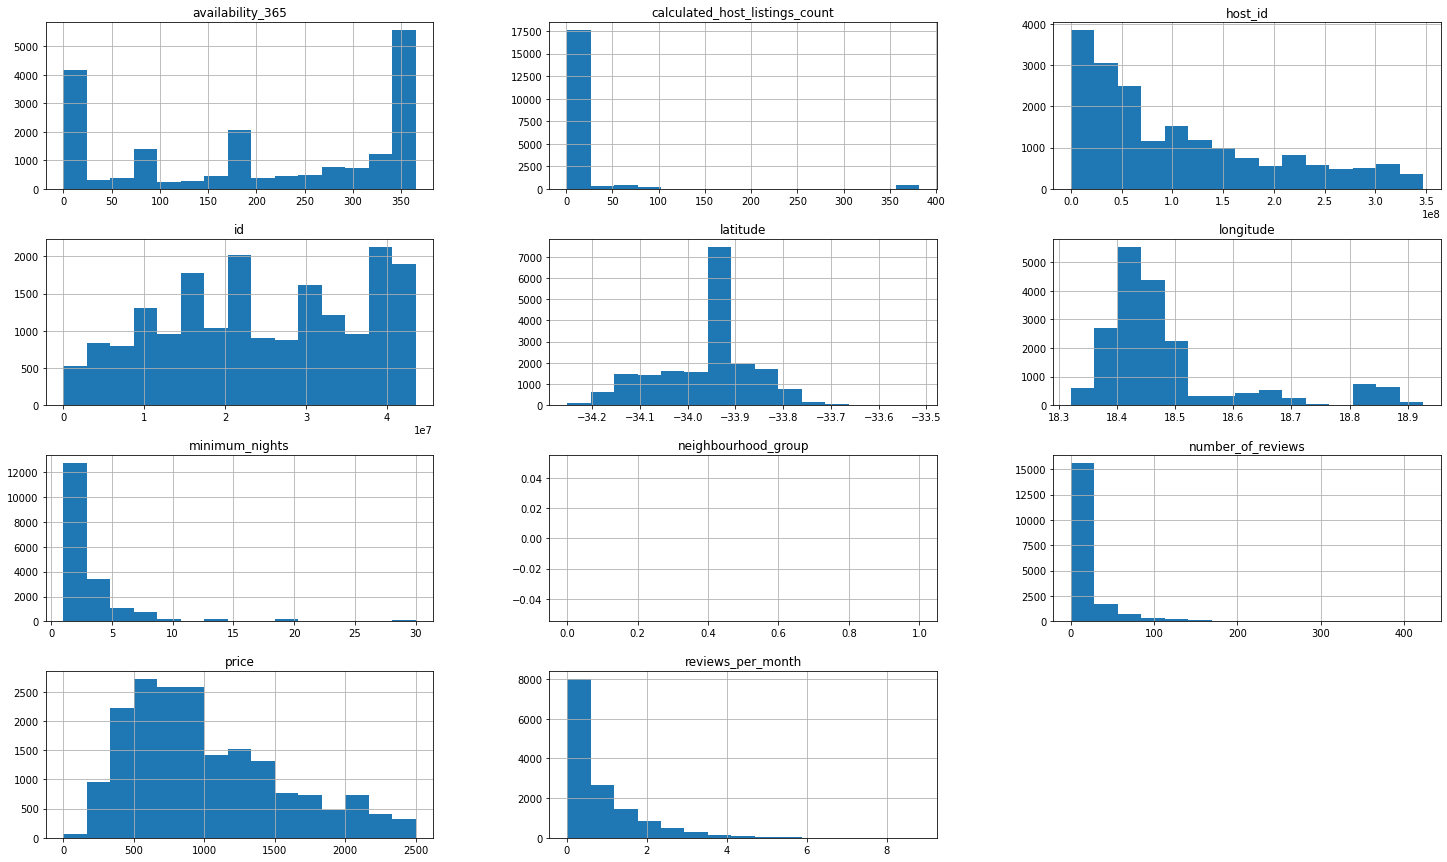

In [ ]:
# remove os outliers em um novo DataFrame 
# Em uma 1a análise, optou-se por eliminar preços maiores que $ 2.500 e
# número de noites superiores a 30
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 2500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# plota o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(25,15));

# **Q6. Qual a correlação existente entre as variáveis ?**
Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre algumas colunas, desta forma gerar:
* Uma matriz de correlação;
* Um heatmap a partir dessa matriz (usando a biblioteca seaborn).

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.089194,-0.039068,-0.062481,0.015351,0.027253
minimum_nights,0.089194,1.000000,-0.014534,-0.012034,-0.049772,-0.081544
number_of_reviews,-0.039068,-0.014534,1.000000,0.743882,-0.051901,0.069363
reviews_per_month,-0.062481,-0.012034,0.743882,1.000000,-0.016868,0.057649
calculated_host_listings_count,0.015351,-0.049772,-0.051901,-0.016868,1.000000,0.065657
availability_365,0.027253,-0.081544,0.069363,0.057649,0.065657,1.000000


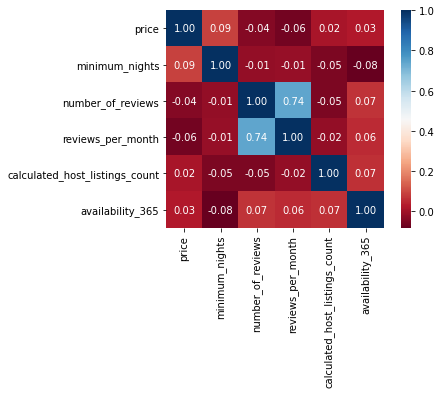

In [ ]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

# **Q7. Qual o tipo de imóvel mais alugado ?**
A coluna da variável room_type indica o tipo de locação que está anunciada no Airbnb. No site, existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método value_counts().


In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df.room_type.value_counts()

Entire home/apt    18320
Private room        5213
Hotel room           408
Shared room          138
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df.room_type.value_counts() / df.shape[0]

Entire home/apt    0.760829
Private room       0.216496
Hotel room         0.016944
Shared room        0.005731
Name: room_type, dtype: float64

# **Q8. Qual a localidade mais cara na cidade Cape Town?**



In [ ]:
# ver preços por bairros (neighbourhood), na média
df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Ward 106    144793.000000
Ward 92      37298.800000
Ward 79       9494.000000
Ward 54       6018.903907
Ward 62       4718.753070
Ward 52       4493.000000
Ward 40       3998.000000
Ward 74       3863.500873
Ward 78       2999.000000
Ward 71       2707.480392
Name: price, dtype: float64

# **Q9. Como estão distribuídos geograficamente os imóveis, em função do preço na cidade Cape Town?**

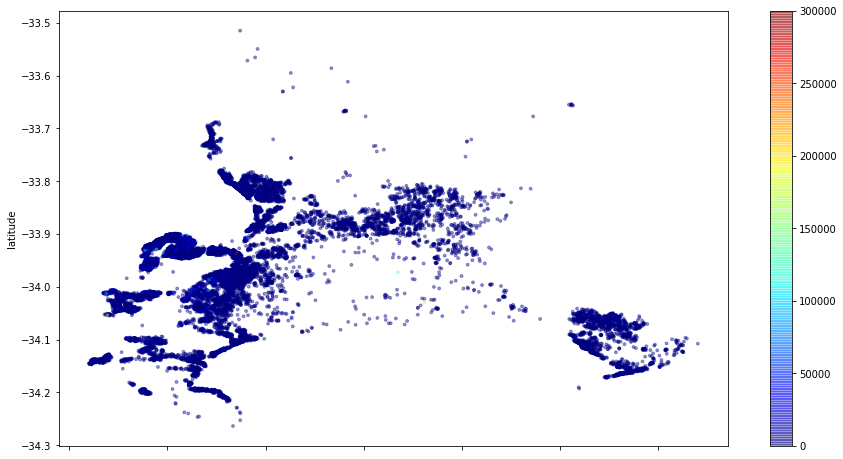

In [ ]:
# plotar os imóveis pela latitude-longitude
df.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(15,8));

# Conclusões


* Este Notebook, serve como uma análise inicial exploratória dos dados;

* Foram detectados alguns *outliers* existentes em algumas colunas;

* Foram eliminiados alguns *outliers* da amostra para a realização de algumas observações;

* Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis [listings.csv.gz](http://data.insideairbnb.com/south-africa/wc/cape-town/2020-05-25/data/listings.csv.gz) .

#### Esta análise está baseada no Template do Curso - **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---
